## 1. 데이터 불러오기 및 확인

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기

titanic_data_train = pd.read_csv("titanic/train.csv")
titanic_data_test = pd.read_csv("titanic/test.csv")

In [3]:
titanic_data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#survival	Survival	    0 = No, 1 = Yes
#pclass	    Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sex	    Sex	
#Age	    Age in years	
#sibsp	    # of siblings / spouses aboard the Titanic	
#parch	    # of parents / children aboard the Titanic	
#ticket	    Ticket number	
#fare	    Passenger fare	
#cabin	    Cabin number(선실 번호)	
#embarked	Port of Embarkation(출발 항만)	C = Cherbourg, Q = Queenstown, S = Southampton

titanic_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


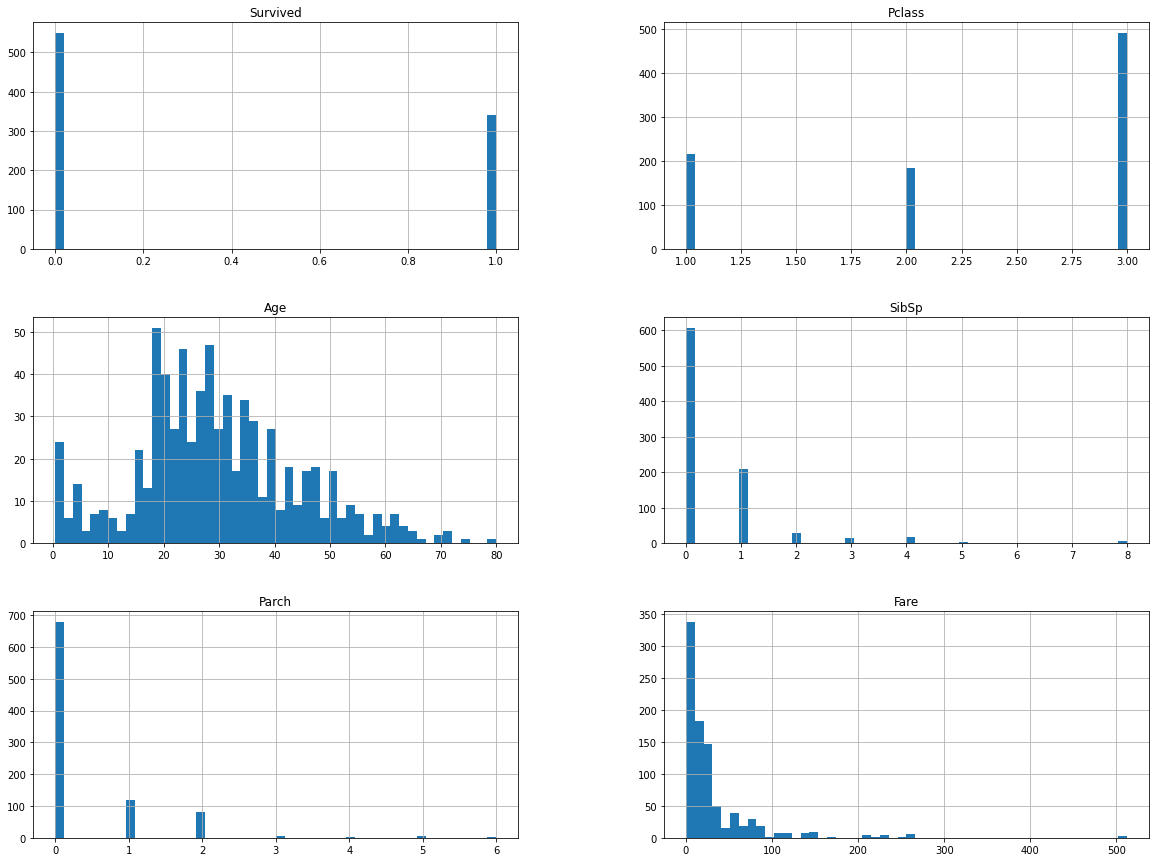

In [5]:
import matplotlib.pyplot as plt
titanic_data_train.drop("PassengerId", axis=1).hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
corr_matrix = titanic_data_train.corr()
corr_matrix["Survived"].sort_values

<bound method Series.sort_values of PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64>

In [7]:
corr_matrix["Age"].sort_values

<bound method Series.sort_values of PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Name: Age, dtype: float64>

## 2. 데이터 전처리(파이프라인은 아래 ```전처리 파이프라인```으로)

In [8]:
# index역할을 하는 PassengerId, 전부 unique한 값을 가지고 있고 레이블과 큰 관련이 없어 보이는 Name/Ticket, 
# 결측치가 많은 Cabin column들 제거
titanic_data_train_dropped = titanic_data_train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
# Embarked 값이 없는 row 제거
titanic_data_train_dropped = titanic_data_train_dropped.dropna(subset=["Embarked"])
titanic_data_train_dropped = titanic_data_train_dropped.reset_index(drop=True)

In [9]:
titanic_data_train_dropped

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S
885,1,1,female,19.0,0,0,30.0000,S
886,0,3,female,NaN,1,2,23.4500,S
887,1,1,male,26.0,0,0,30.0000,C


In [10]:
# 문자열 데이터인 성별은 OrdinalEncoding, 출발지(Embarked)는 OneHotEncoding 처리
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()
onehot_enc = OneHotEncoder()

titanic_ordinal = ordinal_enc.fit_transform(titanic_data_train_dropped[["Sex"]])
titanic_onehot = onehot_enc.fit_transform(titanic_data_train_dropped[["Embarked"]])

In [11]:
onehot_enc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [12]:
enc_categories = np.concatenate((["Sex"], onehot_enc.categories_[0]), axis=None)
titanic_enc = np.append(titanic_ordinal, titanic_onehot.toarray(), axis=1)
titanic_data_train_dropped = titanic_data_train_dropped.drop(["Sex", "Embarked"], axis=1)

titanic_enc = pd.concat([titanic_data_train_dropped, pd.DataFrame(titanic_enc, columns=enc_categories)], axis=1)

In [13]:
titanic_enc

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
884,0,2,27.0,0,0,13.0000,1.0,0.0,0.0,1.0
885,1,1,19.0,0,0,30.0000,0.0,0.0,0.0,1.0
886,0,3,NaN,1,2,23.4500,0.0,0.0,0.0,1.0
887,1,1,26.0,0,0,30.0000,1.0,1.0,0.0,0.0


In [14]:
# Age column의 결측치 채우기.
# Age는 Pclass row와 상관계수가 높으므로 각 Pclass에 따른 age의 중간값을 결측치를 채우는 데 사용.
titanic_data_train_ready = titanic_enc
means = titanic_data_train_ready.groupby(["Pclass"])["Age"].median()

In [15]:
means

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [16]:
titanic_data_train_ready = titanic_data_train_ready.set_index(["Pclass"])
titanic_data_train_ready["Age"] = titanic_data_train_ready["Age"].fillna(means)
titanic_data_train_ready = titanic_data_train_ready.reset_index()

In [17]:
titanic_data_train_ready

,Pclass,Survived,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,3,0,22.0,1,0,7.2500,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0
2,3,1,26.0,0,0,7.9250,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0
4,3,0,35.0,0,0,8.0500,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
884,2,0,27.0,0,0,13.0000,1.0,0.0,0.0,1.0
885,1,1,19.0,0,0,30.0000,0.0,0.0,0.0,1.0
886,3,0,24.0,1,2,23.4500,0.0,0.0,0.0,1.0
887,1,1,26.0,0,0,30.0000,1.0,1.0,0.0,0.0


In [18]:
# 레이블 분리 및 Standardization
from sklearn.preprocessing import StandardScaler

titanic_data_train_X = titanic_data_train_ready.drop("Survived", axis=1)
titanic_data_train_y = titanic_data_train_ready["Survived"]

scl = StandardScaler()
titanic_data_train_X = scl.fit_transform(titanic_data_train_X)


## 3. 모델 훈련

In [19]:
# SVM으로 훈련

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_clf = SVC(gamma="auto")

svm_scores = cross_val_score(svm_clf, titanic_data_train_X, titanic_data_train_y, cv=10)
svm_scores

array([0.83146067, 0.84269663, 0.76404494, 0.86516854, 0.83146067,
       0.78651685, 0.83146067, 0.76404494, 0.87640449, 0.84090909])

In [20]:
svm_clf.fit(titanic_data_train_X, titanic_data_train_y)

SVC(gamma='auto')

In [21]:
# test set(제출할 데이터 셋)에 대해 동일한 전처리
titanic_data_test_dropped = titanic_data_test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
titanic_data_test_dropped = titanic_data_test_dropped.dropna(subset=["Embarked"])
titanic_data_test_dropped = titanic_data_test_dropped.reset_index(drop=True)

ordinal_enc = OrdinalEncoder()
onehot_enc = OneHotEncoder()

titanic_ordinal = ordinal_enc.fit_transform(titanic_data_test_dropped[["Sex"]])
titanic_onehot = onehot_enc.fit_transform(titanic_data_test_dropped[["Embarked"]])

enc_categories = np.concatenate((["Sex"], onehot_enc.categories_[0]), axis=None)
titanic_enc = np.append(titanic_ordinal, titanic_onehot.toarray(), axis=1)
titanic_data_test_dropped = titanic_data_test_dropped.drop(["Sex", "Embarked"], axis=1)

titanic_enc = pd.concat([titanic_data_test_dropped, pd.DataFrame(titanic_enc, columns=enc_categories)], axis=1)

titanic_data_test_ready = titanic_enc
means = titanic_data_test_ready.groupby(["Pclass"])["Age"].median()

titanic_data_test_ready = titanic_data_test_ready.set_index(["Pclass"])
titanic_data_test_ready["Age"] = titanic_data_test_ready["Age"].fillna(means)
titanic_data_test_ready = titanic_data_test_ready.reset_index()

titanic_data_test_ready.fillna(titanic_data_test_ready.mean(), inplace=True)

scl = StandardScaler()
titanic_data_test_X = scl.fit_transform(titanic_data_test_ready)

In [22]:
titanic_data_test_X

array([[ 0.87348191,  0.39304753, -0.49947002, ..., -0.56814154,
         2.84375747, -1.35067551],
       [ 0.87348191,  1.35630895,  0.61699237, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [-0.31581919,  2.51222265, -0.49947002, ..., -0.56814154,
         2.84375747, -1.35067551],
       ...,
       [ 0.87348191,  0.70129118, -0.49947002, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.87348191, -0.41609206, -0.49947002, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 0.87348191, -0.41609206,  0.61699237, ...,  1.76012477,
        -0.35164743, -1.35067551]])

In [23]:
titanic_data_predict = svm_clf.predict(titanic_data_test_X)

In [24]:
titanic_data_predict = pd.DataFrame(titanic_data_predict, columns=["Survived"])

In [25]:
pd.concat([titanic_data_test["PassengerId"].to_frame(), titanic_data_predict], axis=1).to_csv("result.csv", index=False)

    
    
-------------------
    
## 4. 전처리 파이프라인

In [3]:
# train set 필요없는 column 제거, 레이블 분리
titanic_data_train_dropped = titanic_data_train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
titanic_data_train_dropped = titanic_data_train_dropped.dropna(subset=["Embarked"])
titanic_data_train_dropped = titanic_data_train_dropped.reset_index(drop=True)

titanic_data_train_X = titanic_data_train_dropped.drop(["Survived"], axis=1)
titanic_data_train_y = titanic_data_train_dropped["Survived"]

In [4]:
# test set 필요없는 columm 제거
titanic_data_test_dropped = titanic_data_test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
titanic_data_test_dropped = titanic_data_test_dropped.dropna(subset=["Embarked"])
titanic_data_test_dropped = titanic_data_test_dropped.reset_index(drop=True)

In [6]:
# 수치형 column 파이프라인
# Age column의 결측치는 대상 row의 Pclass끼리 그룹화하여 Age의 중간값으로 채워넣고
# 그 외의 결측치는 해당 column의 평균으로 채워넣음.

# 전체 수치형 데이터에 대해 standardization 수행
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

class PclassBasedAgeImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        self.means = X.groupby(["Pclass"])["Age"].median()
        return self
    def transform(self, X):
        X = X.set_index(["Pclass"])
        X["Age"] = X["Age"].fillna(self.means)
        X = X.reset_index()
        if(X.isnull().values.any()):
            X.fillna(X.mean(), inplace=True)
        return X

num_attribs = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

num_pipeline = Pipeline([
    ('imputer', PclassBasedAgeImputer()),
    ('scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("sex", OrdinalEncoder(), ["Sex"]),
    ("embark", OneHotEncoder(), ["Embarked"]),
])

In [7]:
titanic_data_train_X = full_pipeline.fit_transform(titanic_data_train_X)
titanic_data_test_X = full_pipeline.fit_transform(titanic_data_test_dropped)

In [8]:
pd.DataFrame(titanic_data_train_X, columns=["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex", "C", "Q", "S"])

,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,0.825209,-0.531670,0.431350,-0.474326,-0.500240,1.0,0.0,0.0,1.0
1,-1.572211,0.680232,0.431350,-0.474326,0.788947,0.0,1.0,0.0,0.0
2,0.825209,-0.228695,-0.475199,-0.474326,-0.486650,0.0,0.0,0.0,1.0
3,-1.572211,0.453001,0.431350,-0.474326,0.422861,0.0,0.0,0.0,1.0
4,0.825209,0.453001,-0.475199,-0.474326,-0.484133,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
884,-0.373501,-0.152951,-0.475199,-0.474326,-0.384475,1.0,0.0,0.0,1.0
885,-1.572211,-0.758902,-0.475199,-0.474326,-0.042213,0.0,0.0,0.0,1.0
886,0.825209,-0.380182,0.431350,2.006119,-0.174084,0.0,0.0,0.0,1.0
887,-1.572211,-0.228695,-0.475199,-0.474326,-0.042213,1.0,1.0,0.0,0.0


### 5_1. SVM

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_clf = SVC(gamma="auto")

svm_scores = cross_val_score(svm_clf, titanic_data_train_X, titanic_data_train_y, cv=10)
svm_scores.mean()

0.8211695607763023

In [10]:
svm_clf.fit(titanic_data_train_X, titanic_data_train_y)

results = svm_clf.predict(titanic_data_test_X)

In [11]:
results = pd.DataFrame(results, columns=["Survived"])
pd.concat([titanic_data_test["PassengerId"].to_frame(), results], axis=1).to_csv("result.csv", index=False)

### 5_1_1. SVM hyperparameter tuning

In [99]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': [19, 20, 21],  'gamma': ["auto"], 'degree': [1, 2, 3], 'kernel': ['poly']},
  {'C': [15, 20, 25],  'gamma': ["auto"], 'kernel': ['sigmoid']},
 ]

svm_clf = SVC()

svm_grid = GridSearchCV(svm_clf, param_grid, cv=10, return_train_score=True, verbose=2)
svm_grid.fit(titanic_data_train_X, titanic_data_train_y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ............C=19, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=19, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=19, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=19, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=19, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=19, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=19, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=19, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=19, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=19, degree=1, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=19, degree=2, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ............C=19, degree=2, gamma=aut

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [19, 20, 21], 'degree': [1, 2, 3],
                          'gamma': ['auto'], 'kernel': ['poly']},
                         {'C': [15, 20, 25], 'gamma': ['auto'],
                          'kernel': ['sigmoid']}],
             return_train_score=True, verbose=2)

In [100]:
cvres = svm_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7862487231869254 {'C': 19, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.8335418794688458 {'C': 19, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
0.8133171603677221 {'C': 19, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
0.7862487231869254 {'C': 20, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.8346654749744638 {'C': 20, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
0.8121935648621041 {'C': 20, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
0.7862487231869254 {'C': 21, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.8335418794688458 {'C': 21, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
0.8088227783452503 {'C': 21, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
0.6860444330949947 {'C': 15, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.6692288049029622 {'C': 20, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.6602017364657815 {'C': 25, 'gamma': 'auto', 'kernel': 'sigmoid'}


In [101]:
svm_grid.best_params_

{'C': 20, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [102]:
svm_grid.best_score_

0.8346654749744638

In [106]:
svm_grid.best_estimator_

SVC(C=20, degree=2, gamma='auto', kernel='poly')

In [107]:
results = svm_grid.best_estimator_.predict(titanic_data_test_X)

results = pd.DataFrame(results, columns=["Survived"])
pd.concat([titanic_data_test["PassengerId"].to_frame(), results], axis=1).to_csv("result.csv", index=False)

### 5_2. RandomForestClassifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_scores = cross_val_score(forest_clf, titanic_data_train_X, titanic_data_train_y, cv=10)

forest_scores.mean()

0.8166624106230846

In [110]:
forest_clf.fit(titanic_data_train_X, titanic_data_train_y)
results = forest_clf.predict(titanic_data_test_X)

results = pd.DataFrame(results, columns=["Survived"])
pd.concat([titanic_data_test["PassengerId"].to_frame(), results], axis=1).to_csv("result.csv", index=False)

### 5_2_1. RandomForestClassifier hyperparameter tuning

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 100, 500], 'min_samples_split': [1, 2, 3], 'min_samples_leaf': [0.5, 1, 2], 'bootstrap': [True, False]}
]

random_clf = RandomForestClassifier()
forest_grid = GridSearchCV(random_clf, param_grid, cv=10, return_train_score=True, n_jobs=2, verbose=1)
forest_grid.fit(titanic_data_train_X, titanic_data_train_y)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


d:\pythonenv\mlenv\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.61754341 0.61754341 0.61754341
 0.61754341 0.61754341 0.61754341        nan        nan        nan
 0.81668795 0.81330439 0.81667518 0.81216803 0.82230592 0.82342952
        nan        nan        nan 0.82567671 0.83465271 0.83463994
 0.82566394 0.8357763  0.83351634        nan        nan        nan
 0.61754341 0.61754341 0.61754341 0.61754341 0.61754341 0.61754341
        nan        nan        nan 0.79868488 0.79982125 0.79869765
 0.81109551 0.80769918 0.8032048         nan        nan        nan
 0.82906027 0.83015832 0.82791113 0.82118233 0.82566394 0.83015832]
  warnings.warn(
d:\pythonenv\mlenv\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan 0.61754775 0.61754775 0.61754775
 0.61754775 0.61754775 0.61754775    

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid=[{'bootstrap': [True, False],
                          'min_samples_leaf': [0.5, 1, 2],
                          'min_samples_split': [1, 2, 3],
                          'n_estimators': [10, 100, 500]}],
             return_train_score=True, verbose=1)

In [41]:
cvres = forest_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    if not np.isnan(mean_score):
        print(mean_score, params)

0.6175434116445352 {'bootstrap': True, 'min_samples_leaf': 0.5, 'min_samples_split': 2, 'n_estimators': 10}
0.6175434116445352 {'bootstrap': True, 'min_samples_leaf': 0.5, 'min_samples_split': 2, 'n_estimators': 100}
0.6175434116445352 {'bootstrap': True, 'min_samples_leaf': 0.5, 'min_samples_split': 2, 'n_estimators': 500}
0.6175434116445352 {'bootstrap': True, 'min_samples_leaf': 0.5, 'min_samples_split': 3, 'n_estimators': 10}
0.6175434116445352 {'bootstrap': True, 'min_samples_leaf': 0.5, 'min_samples_split': 3, 'n_estimators': 100}
0.6175434116445352 {'bootstrap': True, 'min_samples_leaf': 0.5, 'min_samples_split': 3, 'n_estimators': 500}
0.816687946884576 {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
0.8133043922369765 {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.8166751787538304 {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.8121680286006129 {'bootstra

In [42]:
forest_grid.best_score_

0.8357763023493361

In [43]:
forest_grid.best_params_

{'bootstrap': True,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [44]:
results = forest_grid.best_estimator_.predict(titanic_data_test_X)

results = pd.DataFrame(results, columns=["Survived"])
pd.concat([titanic_data_test["PassengerId"].to_frame(), results], axis=1).to_csv("result.csv", index=False)